#### In this example, we illustrate various unsupervised learning techniques (Clustering, PCA, SVD) using an example term-document matrix as the data. 

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.cluster import KMeans 

In [2]:
Data = pd.read_csv("../data/term-doc-mat.csv", header=None)

In [3]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
# Let's remove the column containing the terms
# TD will be out term x document matrix
TD = Data.iloc[:,1:]
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [5]:
# Reindex the columns to start from 0
TD.columns= range(15)
TD

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [6]:
# The list of our index terms
terms = Data.iloc[:,0]
terms

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

#### First, we want to do some document clustering. Since the data is in term-document format, we need to obtain the transpose of the TD matrix.

In [7]:
DT = TD.T

#### Now we have a document-term matrix:

In [8]:
DT

,0,1,2,3,4,5,6,7,8,9
0,24,9,0,3,1,12,0,1,21,2
1,32,5,3,0,0,2,0,0,10,0
2,12,5,0,0,0,0,0,0,16,0
3,6,2,0,0,0,0,0,0,7,2
4,43,20,3,0,0,27,0,2,31,0
5,2,0,7,16,33,0,18,0,0,27
6,0,1,12,0,2,0,32,0,0,4
7,3,0,4,2,0,0,22,0,0,2
8,1,0,27,25,7,0,34,3,0,11
9,6,0,4,23,12,22,17,9,0,8


In [9]:
numTerms=TD.shape[0]
NDocs = TD.shape[1]

#### Next, we will transform the data to TFxIDF weights (this is not necessary for clustering, but we will do it here for illustration purposes):

In [10]:
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs
# first let's find the doc counts for each term
DF = pd.DataFrame([(TD!=0).sum(1)]).T
DF

,0
0,10
1,11
2,8
3,10
4,9
5,8
6,5
7,9
8,6
9,12


In [11]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]]


In [12]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

In [13]:
np.set_printoptions(precision=2,suppress=True)
print(IDF)

[[0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32]
 [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]]


In [14]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [15]:
pd.set_option("display.precision", 2)

TD_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.04,18.72,7.02,3.51,25.15,1.17,0.00,1.75,0.58,3.51,2.34,0.00,0.00,0.00,0.00
1,4.03,2.24,2.24,0.89,8.95,0.00,0.45,0.00,0.00,0.00,12.08,6.26,1.34,0.89,4.92
2,0.00,2.72,0.00,0.00,2.72,6.35,10.88,3.63,24.49,3.63,0.00,0.91,0.00,0.00,0.00
3,1.75,0.00,0.00,0.00,0.00,9.36,0.00,1.17,14.62,13.45,4.09,7.02,12.28,1.75,1.17
4,0.74,0.00,0.00,0.00,0.00,24.32,1.47,0.00,5.16,8.84,10.32,3.68,8.84,2.95,0.00
5,10.88,1.81,0.00,0.00,24.49,0.00,0.00,0.00,0.00,19.95,8.16,3.63,0.00,4.53,2.72
6,0.00,0.00,0.00,0.00,0.00,28.53,50.72,34.87,53.89,26.94,0.00,0.00,0.00,0.00,0.00
7,0.74,0.00,0.00,0.00,1.47,0.00,0.00,0.00,2.21,6.63,19.90,5.16,3.68,2.95,2.95
8,27.76,13.22,21.15,9.25,40.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.00
9,0.64,0.00,0.00,0.64,0.00,8.69,1.29,0.64,3.54,2.58,10.62,5.15,4.51,2.25,0.97


#### Now we are ready for clustering. We'll use the kMeans module of the MLA book from Ch. 10.

In [16]:
import kMeans
import importlib

In [17]:
importlib.reload(kMeans)

<module 'kMeans' from '/home/roselyne/classes/DSC478/week8/kMeans.py'>

In [18]:
# First transpose to get the doc by term matrix and then call kMeans to cluster the docs

DT_tfidf = TD_tfidf.T
DT_tfidf = np.array(DT_tfidf)

centroids_tfidf, clusters_tfidf = kMeans.kMeans(DT_tfidf, 3, kMeans.distCosine, kMeans.randCent)

#### Let's take a look at the cluster centroids

In [19]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(centroids_tfidf, columns=terms)
centroids

,database,index,likelihood,linear,matrix,query,regression,retrieval,sql,vector
0,13.69,3.67,1.09,0.35,0.15,7.44,0.00,0.44,22.47,0.26
1,0.47,5.10,0.18,5.26,5.16,3.81,0.00,6.93,0.26,4.70
2,1.40,0.09,9.79,7.72,7.96,3.99,38.99,1.77,0.00,3.35


#### Because the centroids are based on TFxIDF weights, they are not as descriptive as raw term frequencies or binary occurrence data. Let's redo the clustering with the original raw term frequencies.

In [20]:
DT = np.array(DT)
centroids, clusters = kMeans.kMeans(DT, 3, kMeans.distCosine, kMeans.randCent)

In [21]:
centroids = pd.DataFrame(centroids, columns=terms)
centroids

,database,index,likelihood,linear,matrix,query,regression,retrieval,sql,vector
0,23.40,8.20,1.20,0.60,0.20,8.20,0.00,0.60,17.00,0.80
1,6.00,0.00,4.00,23.00,12.00,22.00,17.00,9.00,0.00,8.00
2,1.11,6.44,5.67,9.78,8.56,2.33,11.78,5.56,0.11,13.00


#### The cluster centroids reveal some general patterns in the data as well as unique characterisitcs of each cluster. For example, it's clear that Cluster 2 is dominated by documents related to SQL databases while Cluster 0 contains documents primarily related to linear regresssion, etc.

In [22]:
# Let's look at cluster assigmens for each of the instances in the data.
print(clusters)

[[0.   0.  ]
 [0.   0.01]
 [0.   0.01]
 [0.   0.01]
 [0.   0.  ]
 [2.   0.02]
 [2.   0.14]
 [2.   0.16]
 [2.   0.04]
 [1.   0.  ]
 [2.   0.07]
 [2.   0.04]
 [2.   0.05]
 [2.   0.06]
 [2.   0.23]]


In [23]:
doc_clusters = pd.DataFrame(clusters, columns=["Cluster", "MinDistance**2"])
doc_clusters

,Cluster,MinDistance**2
0,0.00,0.00
1,0.00,0.01
2,0.00,0.01
3,0.00,0.01
4,0.00,0.00
5,2.00,0.02
6,2.00,0.14
7,2.00,0.16
8,2.00,0.04
9,1.00,0.00


#### Next, let's use principal component analysis to reduce the dimensionality of the data:

In [24]:
from sklearn import decomposition

#### We'll perform PCA to obtain the top 5 components and then transform the DT matrix into the lower dimensional space of 5 components:

In [25]:
pca = decomposition.PCA(n_components=5)
DTtrans = pca.fit(DT).transform(DT)

In [26]:
np.set_printoptions(precision=2,suppress=True)
print(DTtrans)

[[ 25.45  -1.8    4.02   3.12   0.24]
 [ 23.78  -7.29  -0.53   4.77  -6.32]
 [ 15.03  -5.44 -10.09   3.46  -2.87]
 [  6.75  -4.39 -14.84   3.08  -0.44]
 [ 46.7    0.01  21.78  -3.11   0.29]
 [-27.41   7.93  12.27  15.16 -13.47]
 [-15.67 -21.74  -1.33 -11.4   -5.81]
 [ -8.28 -16.54  -6.94  -5.39  -1.47]
 [-29.51 -18.64  16.68  -4.82   1.69]
 [-11.41   0.44  15.03   3.03  17.19]
 [ -6.98  37.69   4.5  -14.83  -5.5 ]
 [ -5.97  13.91  -6.64  -2.12   3.32]
 [-12.36  10.4   -4.93  11.5    5.51]
 [ -1.67   2.69 -13.18   2.04   3.72]
 [  1.53   2.79 -15.8   -4.49   3.94]]


In [27]:
print(pca.explained_variance_ratio_)

[0.45 0.23 0.15 0.07 0.05]


#### Looking at the above, it can be obsereved that the first 5 components capture (explain) 95% of the variance in the data.

#### Now, we can redo the clustering, but this time in the lower dimensional space:

In [28]:
centroids_pca, clusters_pca = kMeans.kMeans(DTtrans, 3, kMeans.distCosine, kMeans.randCent)

In [29]:
print(clusters_pca)

[[0.   0.  ]
 [0.   0.  ]
 [0.   0.03]
 [0.   0.31]
 [0.   0.01]
 [1.   0.14]
 [1.   0.06]
 [1.   0.17]
 [1.   0.  ]
 [1.   0.21]
 [2.   0.05]
 [2.   0.  ]
 [2.   0.11]
 [2.   0.14]
 [2.   0.19]]


#### Next, let's actually derive the principal components manaually using linear algebra rather than relying on the PCA package from sklearn:

#### First step is to obtain the covariance matrix:

In [30]:
meanVals = np.mean(DT, axis=0)
meanRemoved = DT - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print(covMat)

[[179.7   38.44 -17.06 -50.7  -40.93  66.87 -60.9  -19.62 116.32 -59.49]
 [ 38.44  67.26 -21.54 -19.81  -6.5   31.83 -55.7   38.13  27.67  27.04]
 [-17.06 -21.54  51.78  31.1    9.36 -11.61  77.41  -8.72 -16.2    4.67]
 [-50.7  -19.81  31.1   85.97  51.43   2.54  45.59  15.13 -41.97  47.47]
 [-40.93  -6.5    9.36  51.43  80.57  -4.43  25.86  17.64 -35.07  74.14]
 [ 66.87  31.83 -11.61   2.54  -4.43  72.97 -22.49  15.7   45.17  -8.39]
 [-60.9  -55.7   77.41  45.59  25.86 -22.49 162.03 -18.1  -50.37   7.87]
 [-19.62  38.13  -8.72  15.13  17.64  15.7  -18.1   48.12 -19.18  49.06]
 [116.32  27.67 -16.2  -41.97 -35.07  45.17 -50.37 -19.18  93.92 -48.33]
 [-59.49  27.04   4.67  47.47  74.14  -8.39   7.87  49.06 -48.33 102.26]]


In [31]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))

In [32]:
print(eigVals)

[426.77 214.24 144.96  61.87  47.51  26.97  13.24   1.06   3.25   4.71]


In [33]:
print(eigVects)

[[ 0.57  0.09 -0.46  0.14 -0.26 -0.15  0.58  0.05 -0.1  -0.02]
 [ 0.18 -0.39 -0.1  -0.51 -0.12 -0.19 -0.22 -0.3  -0.35 -0.49]
 [-0.18  0.26 -0.3  -0.19 -0.11 -0.48 -0.11 -0.06  0.69 -0.2 ]
 [-0.29 -0.1  -0.36  0.35  0.53 -0.49 -0.02 -0.03 -0.36  0.03]
 [-0.26 -0.27 -0.31  0.47 -0.33  0.34 -0.05 -0.53  0.14 -0.11]
 [ 0.21 -0.13 -0.43 -0.13  0.56  0.51 -0.09  0.2   0.27 -0.21]
 [-0.4   0.51 -0.42 -0.37 -0.17  0.28  0.01 -0.01 -0.38  0.12]
 [-0.06 -0.38 -0.08 -0.41  0.14 -0.05  0.28 -0.33  0.17  0.66]
 [ 0.42  0.08 -0.23  0.11 -0.14 -0.07 -0.72 -0.01 -0.05  0.46]
 [-0.28 -0.51 -0.21 -0.03 -0.37 -0.04 -0.04  0.69  0.01  0.07]]


In [34]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print(sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print(varPercentage)

[426.77 214.24 144.96  61.87  47.51  26.97  13.24   4.71   3.25   1.06]
[45.18 22.68 15.35  6.55  5.03  2.86  1.4   0.5   0.34  0.11]


#### We can plot the principal components based on the percentage of variance they capture:

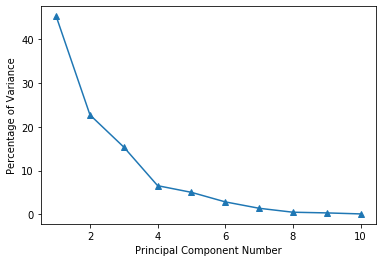

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [36]:
topNfeat = 5
topEigValInd = eigValInd[:topNfeat]  #cut off unwanted dimensions
reducedEigVects = eigVects[:,topEigValInd]   #reorganize eig vects largest to smallest
reducedDT = np.dot(meanRemoved, reducedEigVects)    #transform data into new dimensions
print(reducedDT)

[[ 25.45   1.8   -4.02   3.12   0.24]
 [ 23.78   7.29   0.53   4.77  -6.32]
 [ 15.03   5.44  10.09   3.46  -2.87]
 [  6.75   4.39  14.84   3.08  -0.44]
 [ 46.7   -0.01 -21.78  -3.11   0.29]
 [-27.41  -7.93 -12.27  15.16 -13.47]
 [-15.67  21.74   1.33 -11.4   -5.81]
 [ -8.28  16.54   6.94  -5.39  -1.47]
 [-29.51  18.64 -16.68  -4.82   1.69]
 [-11.41  -0.44 -15.03   3.03  17.19]
 [ -6.98 -37.69  -4.5  -14.83  -5.5 ]
 [ -5.97 -13.91   6.64  -2.12   3.32]
 [-12.36 -10.4    4.93  11.5    5.51]
 [ -1.67  -2.69  13.18   2.04   3.72]
 [  1.53  -2.79  15.8   -4.49   3.94]]


#### Next, let's look at an application of Singular Value Decomposition. This time, we'll focus on the term-document matrix in order to find themes based on combinations of terms.

In [37]:
u, s, vt = np.linalg.svd(TD, full_matrices=False)

In [38]:
u = np.array([u[i]*(-1) for i in range(len(u))])
print(u)

[[ 0.39 -0.6   0.22  0.17 -0.22  0.1   0.59 -0.07  0.07  0.04]
 [ 0.3  -0.2  -0.33 -0.5  -0.06  0.17 -0.21  0.08  0.57 -0.31]
 [ 0.2   0.16  0.33 -0.16 -0.04  0.4  -0.    0.76 -0.23 -0.02]
 [ 0.37  0.27  0.    0.42  0.49  0.53 -0.04 -0.27  0.16 -0.05]
 [ 0.32  0.23 -0.19  0.49 -0.31 -0.38 -0.03  0.22 -0.   -0.52]
 [ 0.29 -0.23 -0.02  0.    0.66 -0.53 -0.07  0.31  0.03  0.22]
 [ 0.36  0.38  0.62 -0.35 -0.08 -0.3  -0.02 -0.34  0.1  -0.03]
 [ 0.21  0.05 -0.34 -0.38  0.2   0.02  0.28 -0.21 -0.65 -0.33]
 [ 0.23 -0.44  0.15  0.11 -0.15  0.09 -0.72 -0.18 -0.38 -0.02]
 [ 0.42  0.25 -0.42 -0.03 -0.33 -0.   -0.02 -0.01 -0.07  0.68]]


In [39]:
vt = np.array([vt[i]*(-1) for i in range(len(vt))])
print(vt)

[[ 0.24  0.18  0.1   0.06  0.41  0.39  0.18  0.12  0.37  0.35  0.41  0.21  0.21  0.09  0.07]
 [-0.34 -0.32 -0.2  -0.08 -0.63  0.33  0.2   0.11  0.36  0.13  0.06  0.07  0.15  0.02 -0.02]
 [ 0.07  0.14  0.06  0.02  0.13 -0.06  0.4   0.27  0.43  0.08 -0.62 -0.26 -0.2  -0.1  -0.12]
 [ 0.1   0.11  0.04  0.02 -0.03  0.5  -0.43 -0.24 -0.12  0.21 -0.49 -0.1   0.36  0.02 -0.21]
 [-0.01 -0.29 -0.2  -0.12  0.1  -0.52 -0.2  -0.09  0.11  0.69 -0.11  0.08  0.1   0.07  0.08]
 [ 0.03  0.25  0.17  0.08 -0.14 -0.34 -0.28 -0.19  0.56 -0.35 -0.05  0.26  0.36 -0.11  0.07]
 [-0.25  0.77 -0.39 -0.14 -0.16 -0.09 -0.07  0.09 -0.05  0.21  0.18 -0.16 -0.05 -0.05 -0.11]
 [-0.2  -0.09 -0.36 -0.17  0.33  0.21 -0.12 -0.54  0.34 -0.17  0.   -0.06 -0.41  0.08  0.04]
 [-0.14  0.07 -0.3  -0.16  0.18  0.13  0.08  0.21 -0.2  -0.11 -0.34  0.53  0.11 -0.21  0.5 ]
 [ 0.18 -0.01 -0.36  0.22  0.   -0.07  0.01  0.15 -0.01 -0.13 -0.1   0.48 -0.09  0.43 -0.56]]


In [40]:
print(s)

[93.97 77.25 54.14 29.74 26.27 19.76 13.75  9.41  7.88  3.88]


In [41]:
print(np.diag(s))

[[93.97  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   77.25  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   54.14  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   29.74  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   26.27  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   19.76  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   13.75  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    9.41  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    7.88  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    3.88]]


In [42]:
# If we use all the dimensions of U.Sigma.Vt, we will get back to original matrix.

originalTD = np.dot(u, np.dot(np.diag(s), vt))
print(originalTD)

[[24. 32. 12.  6. 43.  2.  0.  3.  1.  6.  4.  0.  0.  0.  0.]
 [ 9.  5.  5.  2. 20.  0.  1.  0. -0.  0. 27. 14.  3.  2. 11.]
 [ 0.  3.  0.  0.  3.  7. 12.  4. 27.  4. -0.  1. -0.  0. -0.]
 [ 3. -0. -0. -0.  0. 16.  0.  2. 25. 23.  7. 12. 21.  3.  2.]
 [ 1.  0.  0. -0.  0. 33.  2.  0.  7. 12. 14.  5. 12.  4.  0.]
 [12.  2.  0.  0. 27. -0. -0. -0.  0. 22.  9.  4.  0.  5.  3.]
 [ 0. -0.  0.  0. -0. 18. 32. 22. 34. 17.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -0.  2. -0.  0.  0.  3.  9. 27.  7.  5.  4.  4.]
 [21. 10. 16.  7. 31.  0.  0. -0. -0.  0.  0. -0.  0.  1. -0.]
 [ 2.  0.  0.  2.  0. 27.  4.  2. 11.  8. 33. 16. 14.  7.  3.]]


In [43]:
# But, the goal of SVD is to use a smaller number of dimensions each of which 
# represent a latent variable capturing some cobminations of features associated 
# with the data (e.g., general themes in the documents). 

numDimensions = 3
u_ld = u[:, :numDimensions]
sigma = np.diag(s)[:numDimensions, :numDimensions]
vt_ld = vt[:numDimensions, :]
lowRankTD = np.dot(u_ld, np.dot(sigma, vt_ld))

In [44]:
# The U.Sigma.Vt in the lower dimensional space gives an approximation of the original materix

np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(lowRankTD)

[[25.33 22.89 13.5   6.13 45.48 -1.98  1.99  2.79  1.9   7.87  4.6   1.34 -1.82  1.01  2.14]
 [10.71  7.37  4.79  2.6  18.7   6.82 -5.26 -3.14 -3.04  6.47 21.6   9.52  6.96  4.02  4.41]
 [ 1.46  2.05  0.6   0.29  2.07 10.24 12.93  8.54 19.25  9.57 -2.74 -0.    2.18  0.08 -0.94]
 [ 1.25 -0.19 -0.45  0.22  1.03 20.3  10.26  6.46 20.37 14.86 15.49  8.63 10.26  3.55  2.17]
 [ 0.3  -1.69 -1.06  0.02 -0.57 18.19  4.81  2.78 13.17 12.03 19.71 10.15 10.88  4.12  3.05]
 [12.74 10.59  6.33  3.07 22.51  4.64  0.76  1.09  3.03  7.25 10.81  4.81  3.12  2.17  2.49]
 [ 0.58  1.9  -0.08  0.01 -0.06 20.55 25.06 16.42 37.57 18.2  -5.23  0.13  4.68  0.16 -1.94]
 [ 2.26 -0.13  0.23  0.54  3.39  9.93 -3.09 -2.23  0.62  5.95 19.64  9.17  8.18  3.73  3.5 ]
 [17.34 15.78  9.34  4.21 31.25 -3.21  0.35  1.28 -0.65  4.05  1.88  0.19 -2.16  0.39  1.3 ]
 [ 1.34 -2.11 -1.07  0.26  0.94 23.19  1.78  0.66 11.78 14.65 31.61 15.6  15.57  6.33  5.21]]


#### The VT matrix can be viewed as the new representation of documents in the lower dimensional space. Instead of row being terms (in the term by document matrix), now each row represents a latent "topic" or "theme" and so we have a topic by document matrix. You can think of each document (columns) being represented in term of the degree to which they reflect one of the topics.

In [45]:
print(vt_ld)

[[ 0.24  0.18  0.1   0.06  0.41  0.39  0.18  0.12  0.37  0.35  0.41  0.21  0.21  0.09  0.07]
 [-0.34 -0.32 -0.2  -0.08 -0.63  0.33  0.2   0.11  0.36  0.13  0.06  0.07  0.15  0.02 -0.02]
 [ 0.07  0.14  0.06  0.02  0.13 -0.06  0.4   0.27  0.43  0.08 -0.62 -0.26 -0.2  -0.1  -0.12]]


#### In information retrieval, a query is compared to documents using vector-space similarity between the query vector and document vectors. In the lower dim. space, this can be achieved by first mapping the query to lower dim. space, and then comparing it to docs in the lower dim. space.

In [46]:
queryVector = np.array([0,0,1,5,4,0,6,0,0,2])

lowDimQuery = np.dot(la.inv(sigma), np.dot(u_ld.T, queryVector))
print(lowDimQuery)


[0.07 0.07 0.05]


In [47]:
# Compute Cosine sim between the query and docs in the lower dimensional space

# first compute the normamlized versions of the query and the docs by dividing each vector by their norm

qNorm = lowDimQuery / la.norm(lowDimQuery)

docNorm = np.array([vt_ld[:,i]/la.norm(vt_ld[:,i]) for i in range(len(vt_ld[0]))])		
print(docNorm)

[[ 0.57 -0.81  0.16]
 [ 0.47 -0.8   0.37]
 [ 0.45 -0.85  0.27]
 [ 0.55 -0.82  0.15]
 [ 0.54 -0.83  0.17]
 [ 0.75  0.64 -0.12]
 [ 0.37  0.41  0.83]
 [ 0.38  0.33  0.86]
 [ 0.55  0.54  0.64]
 [ 0.92  0.33  0.2 ]
 [ 0.55  0.08 -0.83]
 [ 0.61  0.2  -0.77]
 [ 0.64  0.47 -0.61]
 [ 0.64  0.16 -0.75]
 [ 0.53 -0.13 -0.84]]


In [48]:
# Cosine is now the dot product since the vectors are already normalized
sims = np.dot(qNorm, docNorm.T)

# return indices of the docs in decending order of similarity to the query
simInds = sims.argsort()[::-1]
for i in simInds:
    print("Cosine similarity between Document %d and the query is: %.4f" %(i,sims[i]))

Cosine similarity between Document 8 and the query is: 0.9693
Cosine similarity between Document 9 and the query is: 0.8843
Cosine similarity between Document 6 and the query is: 0.8604
Cosine similarity between Document 5 and the query is: 0.8362
Cosine similarity between Document 7 and the query is: 0.8309
Cosine similarity between Document 12 and the query is: 0.4358
Cosine similarity between Document 13 and the query is: 0.1840
Cosine similarity between Document 11 and the query is: 0.1767
Cosine similarity between Document 10 and the query is: 0.0404
Cosine similarity between Document 1 and the query is: -0.0555
Cosine similarity between Document 0 and the query is: -0.0810
Cosine similarity between Document 3 and the query is: -0.1039
Cosine similarity between Document 14 and the query is: -0.1097
Cosine similarity between Document 4 and the query is: -0.1119
Cosine similarity between Document 2 and the query is: -0.1375


#### Now we can also cluster documents, but this time using only the low dimensional representation of the documents in terms of the latent topics.

In [49]:
centroids_svd, clusters_svd = kMeans.kMeans(vt_ld.T, 3, kMeans.distCosine, kMeans.randCent)

In [50]:
print(clusters_svd)

[[0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [2.   0.05]
 [2.   0.01]
 [2.   0.01]
 [2.   0.  ]
 [2.   0.01]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]]
